# Neural Network Training 🧠🏋🏻

In [1]:
import pandas as pd
import numpy as np
import pydot as pyd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K

from keras import models
from keras.layers.normalization import BatchNormalization
from keras.models import model_from_json
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

----

## Regular DataFrame

In [2]:
train = pd.read_csv('../output/fam_df.csv', index_col=0)
train.head()

,F. Transform,Tag
0,18001.000000,1
1,2077.438012,1
2,4324.447678,1
3,7462.545756,1
4,8746.229687,1


In [3]:
X = train.drop(columns=["Tag"])
y = train["Tag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Dummies DataFrame

In [8]:
train_dum = pd.read_csv('../output/fam_dum_df.csv', index_col=0)
train_dum.head()

,F. Transform,Tag_1,Tag_2,Tag_3,Tag_4
0,18001.000000,1,0,0,0
1,2077.438012,1,0,0,0
2,4324.447678,1,0,0,0
3,7462.545756,1,0,0,0
4,8746.229687,1,0,0,0


## Capped DataFrame

In [10]:
train_cap = pd.read_csv('../output/fam_cap_df.csv', index_col=0)
train_cap.head()

,F. Transform,Tag
0,5320.613554,1
1,16340.033255,1
2,5792.903736,1
3,4821.384618,1
4,7837.913872,1


In [11]:
X = train.drop(columns=["Tag"])
y = train["Tag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

---

---

ententa añadir una capa por ejemplo

en model add

cambiar la activacíon que no sea Relu, o el tamaño de cada capa

# Architecture 

In [ ]:
def createModel():
    
    #Model Initialization
    model = Sequential() 
    
    #Adding Input Layer
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    
    #Adding more layers
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    #Flattening
    model.add(Flatten())
    
    #Adding fully connected layer
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    
    #Adding Output Layer
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [ ]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
number_classes = len(train.Tag.unique())+1

inshape=(X_train.shape[1],)
    
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=inshape))
model.add(layers.Dense(90, activation='relu'))
model.add(layers.Dense(90, activation='relu'))
model.add(layers.Dense(90, activation='relu'))

model.add(BatchNormalization())
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(number_classes,activation='softmax'))

model.compile(optimizer='Nadam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy', 'mse'])

model.fit(X_train,
            y_train,
            epochs=5,
            batch_size=500,
            validation_data=(X_test, y_test))


results = model.evaluate(X_test, y_test)
print("\n")
print("Resultados: ",results)
print("\n")

#optimizer='RMSprop'
#loss='sparse_categorical_crossentropy'

Epoch 1/5
584/584 [==============================] - 3s 6ms/step - loss: 0.9749 - accuracy: 0.5154 - mse: 9.3295 - val_loss: 0.9212 - val_accuracy: 0.5357 - val_mse: 9.3408
Epoch 2/5
584/584 [==============================] - 3s 5ms/step - loss: 0.9377 - accuracy: 0.5279 - mse: 9.3335 - val_loss: 0.9156 - val_accuracy: 0.5340 - val_mse: 9.3359
Epoch 3/5
584/584 [==============================] - 3s 6ms/step - loss: 0.9351 - accuracy: 0.5286 - mse: 9.3334 - val_loss: 0.9020 - val_accuracy: 0.5787 - val_mse: 9.3395
Epoch 4/5
584/584 [==============================] - 3s 6ms/step - loss: 0.9350 - accuracy: 0.5302 - mse: 9.3335 - val_loss: 0.9274 - val_accuracy: 0.5417 - val_mse: 9.3364
Epoch 5/5
2281/2281 [==============================] - 3s 1ms/step - loss: 0.9067 - accuracy: 0.5735 - mse: 9.3389


Resultados:  [0.9067227244377136, 0.5735195279121399, 9.338862419128418]




In [ ]:
number_classes=2 #native or non-native
inshape=(X_train.shape[1],)

model = models.Sequential()  #creates the neural network layers:

model.add(layers.Dense(512, activation='relu', input_shape=inshape))
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(number_classes, activation='softmax'))
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

#Fitting of the model
model.fit(X_train,
        y_train,
        epochs=50,
        batch_size=20,
        validation_data=(X_test, y_test))

name="output/0.7741-accuracy-200000-50epochs-loss1.4109"

#Prediction of the model
predictions = model.predict(X_test)
print(predictions)

#Export model for future use
model_json = model.to_json()
with open(name+'.json', "w") as json_file:
    json.dump(model_json, json_file)
model.save_weights(name+'.h5')

modelTraining (X, y)

In [52]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_77 (Dense)             (None, 90)                9090      
_________________________________________________________________
dense_78 (Dense)             (None, 90)                8190      
_________________________________________________________________
dense_79 (Dense)             (None, 90)                8190      
_________________________________________________________________
batch_normalization_12 (Batc (None, 90)                360       
_________________________________________________________________
dense_80 (Dense)             (None, 80)                7280      
_________________________________________________________________
dense_81 (Dense)             (None, 80)              

---

## Compare Predicitons with the Ground Truth

In [12]:
predictions = model.predict(X_test)
print(predictions)

[[2.4383631e-08 1.9215876e-02 1.2847531e-04 3.1350985e-01 6.6714573e-01]
 [4.8244889e-08 1.5795738e-02 1.5763314e-04 3.2081670e-01 6.6322982e-01]
 [2.0466352e-05 4.0102485e-01 4.2924470e-01 8.9796364e-02 7.9913691e-02]
 ...
 [1.6150553e-08 2.2782551e-02 1.1370208e-04 3.0990762e-01 6.6719604e-01]
 [6.4178334e-06 2.6485145e-02 1.3660416e-03 4.7204411e-01 5.0009823e-01]
 [5.4397889e-05 5.4577921e-02 4.8469794e-03 5.6412458e-01 3.7639612e-01]]


---

---

## Drawing Layers' Schema

In [28]:
keras.utils.plot_model(model, "Seq-BN.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


---

## Plotting Accuracy and Loss

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


- B = 34.34 mins
- D = 28.15 mins
- H = 23.80 mins


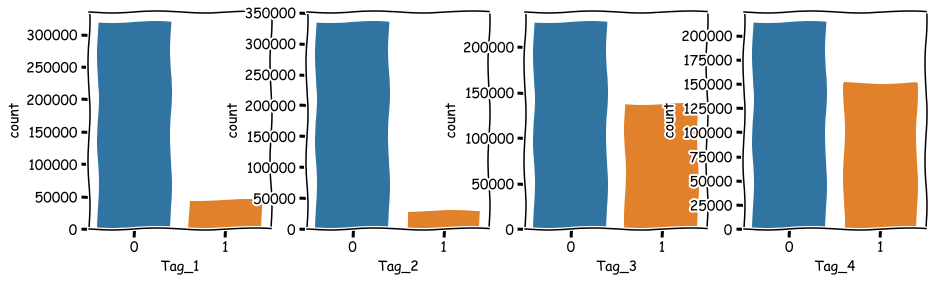

In [26]:
with plt.xkcd():
    f, ax = plt.subplots(1,4, figsize = (15,4))
    sns.countplot(train_dum['Tag_1'], ax = ax[0])
    sns.countplot(train_dum['Tag_2'], ax = ax[1])
    sns.countplot(train_dum['Tag_3'], ax = ax[2])
    sns.countplot(train_dum['Tag_4'], ax = ax[3])

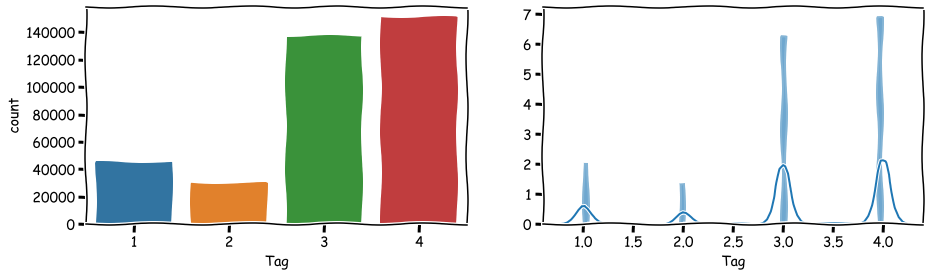

In [47]:
with plt.xkcd():
    f, ax = plt.subplots(1,2, figsize = (15,4))
    sns.countplot(train['Tag'], ax = ax[0])
    sns.distplot(train['Tag'], ax = ax[1])

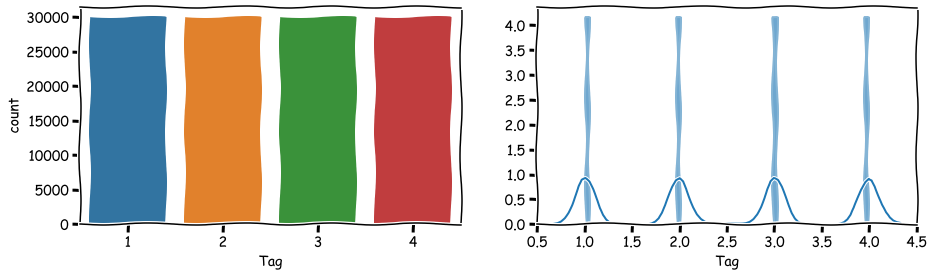

In [13]:
with plt.xkcd():
    f, ax = plt.subplots(1,2, figsize = (15,4))
    sns.countplot(train_cap['Tag'], ax = ax[0])
    sns.distplot(train_cap['Tag'], ax = ax[1])

---

## Plotting Confusion Matrix

In [ ]:
# Plot confusion matrix to have a more detailed view of cross-class missclassifications
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

## Use argmax to project output probabilites as class index label
proba = model.predict(x_test)
print(proba[0])
y_pred = np.argmax(proba, axis=1)
print(y_pred[0])
y_t = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_t, y_pred)

sns.heatmap(cm, annot=True)
plt.xlabel("GT")
plt.ylabel("Predicted")
plt.title(f"Test data = {len(y_pred)} samples")
plt.show()

---

---

## ROC Curve

Best performance: Convolutional neural network with 2D convolutional layers and MaxPooling2D (validation accuracy = 0.95).

In [ ]:
# ROC Curve:
    multiclassROCcurve(model, val_x, val_y, n_classes)

    # Evaluating overfitting:
    accuracyPlot(history, 4)
    lossPlot(history, 4)
    accuracyPlot(history, 10)
    lossPlot(history, 10)

In [ ]:
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

# Extract AUC score
roc_auc_score(y_true, y_scores)

# Extract ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y, y_scores, pos_label=1)

In [ ]:
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

analyzeModels = {
    name:model for name, model in models.items() if name in ["logis","randomforest"]
}

plt.figure(figsize=(10,5))
aucs = []
for name, model in analyzeModels.items():
    y_scores = model.predict_proba(X_test)
    
    alive_scores = y_scores[:,1]
    
    # Extract AUC score
    auc = roc_auc_score(y_test, alive_scores)
    aucs.append(f"AUC({name})={round(auc,2)}")
    # Extract ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, alive_scores, pos_label=1)
    plt.plot(fpr,tpr)

plt.legend(aucs)

---

---

## Saving the Model

In [ ]:
#model.save("data/mnist_train.h5")

In [ ]:
# 57% accuracy achieved with this model:

In [ ]:
number_classes = len(train.Tag.unique())+1

inshape=(X_train.shape[1],)
    
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=inshape))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))


model.add(BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(number_classes,activation='softmax'))

model.compile(optimizer='Nadam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy', 'mse'])

model.fit(X_train,
            y_train,
            epochs=5,
            batch_size=500,
            validation_data=(X_test, y_test))


results = model.evaluate(X_test, y_test)
print("\n")
print("Resultados: ",results)
print("\n")

#optimizer='RMSprop'
#loss='sparse_categorical_crossentropy'

In [ ]:
# 57% accuracy achieved with this model:

In [ ]:
number_classes = len(train.Tag.unique())+1

inshape=(X_train.shape[1],)
    
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=inshape))
model.add(layers.Dense(90, activation='relu'))
model.add(layers.Dense(90, activation='relu'))
model.add(layers.Dense(90, activation='relu'))

model.add(BatchNormalization())
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(number_classes,activation='softmax'))

model.compile(optimizer='Nadam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy', 'mse'])

model.fit(X_train,
            y_train,
            epochs=5,
            batch_size=500,
            validation_data=(X_test, y_test))


results = model.evaluate(X_test, y_test)
print("\n")
print("Resultados: ",results)
print("\n")

#optimizer='RMSprop'
#loss='sparse_categorical_crossentropy'

In [ ]:
number_classes = len(train.Tag.unique())+1

inshape=(X_train.shape[1],)
    
model = models.Sequential()
model.add(layers.Dense(90, activation='relu', input_shape=inshape))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(50, activation='relu'))

model.add(BatchNormalization())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(number_classes,activation='softmax'))

model.compile(optimizer='Nadam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy', 'mse'])

model.fit(X_train,
            y_train,
            epochs=5,
            batch_size=1000,
            validation_data=(X_test, y_test))


results = model.evaluate(X_test, y_test)
print("\n")
print("Resultados: ",results)
print("\n")

#optimizer='RMSprop'
#loss='sparse_categorical_crossentropy'